In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

In [250]:
data = pd.read_csv('accent-recognition/accent-mfcc-data-1.csv')
print(data.shape)
print(data.isnull().sum().sum())
data.head()

(329, 13)
0


,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [251]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
print(X.shape)
print(y.unique())

(329, 12)
['ES' 'FR' 'GE' 'IT' 'UK' 'US']


In [253]:
y.groupby(by=y).count()

language
ES     29
FR     30
GE     30
IT     30
UK     45
US    165
Name: language, dtype: int64

In [252]:
X.groupby(by=y).describe()

X1                                                                \
          count      mean       std       min       25%        50%        75%   
language                                                                        
ES         29.0  9.870596  2.635284  5.836843  7.598763  10.148804  11.957764   
FR         30.0  6.702179  5.407628 -2.339695  2.307446   6.126571  11.561682   
GE         30.0  3.838028  3.006764 -2.880823  2.361031   4.133149   6.128982   
IT         30.0  1.197758  3.430359 -4.835242 -1.231737   1.077553   3.293659   
UK         45.0  2.569596  2.693104 -6.067831  1.467842   3.181085   4.300413   
US        165.0  6.686435  5.374274 -4.222359  3.118493   6.463956  10.941727   

                        X2            ...       X11              X12  \
                max  count      mean  ...       75%       max  count   
language                              ...                              
ES        14.796961   29.0 -5.810810  ...  5.302515  9.166066   29.0   
FR        15.195717   30.0 -5.181109  ...  4.834860  8.485256   30.0   
GE         7.974355   30.0 -1.349269  ...  4.967293  5.874195   30.0   
IT        10.808621   30.0 -1.757358  ...  4.375117  7.452259   30.0   
UK         7.597610   45.0 -3.623697  ...  3.810329  6.666935   45.0   
US        17.749851  165.0 -4.999308  ...  4.808198  7.801054  165.0   

                                                                       \
              mean       std        min       25%       50%       75%   
language                                                                
ES       -3.725110  2.282802  -6.816310 -5.847239 -4.294401 -2.191658   
FR       -5.527352  1.859602  -9.614959 -6.672609 -5.363448 -3.908692   
GE       -5.093963  2.032062  -9.162163 -6.105584 -5.231369 -3.360758   
IT       -3.601017  2.150360  -8.731785 -4.969127 -3.735597 -2.238007   
UK       -4.927075  2.129274  -8.869338 -6.091090 -5.029416 -3.873465   
US       -3.352363  3.495758 -13.724103 -5.739362 -3.306123 -1.227931   

                    
               max  
language            
ES        1.079622  
FR       -1.761528  
GE       -1.504672  
IT        0.463408  
UK        0.910715  
US        5.259430  

[6 rows x 96 columns]

In [254]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [255]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

Originalni skup

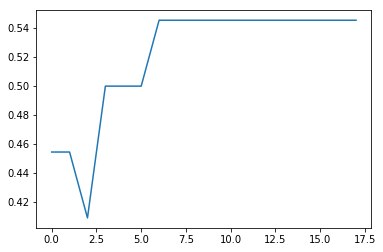

0.6272727272727273


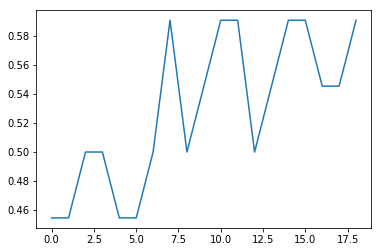

0.6818181818181818


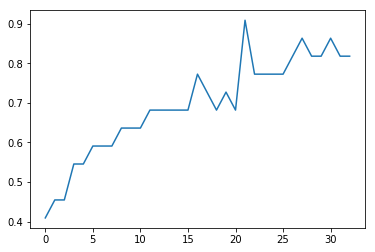

0.7614678899082569
konacna matrica konfuzije: 
 [[ 14.   0.   0.   0.   1.  14.]
 [  0.   3.   2.   2.   0.  23.]
 [  0.   0.  13.   4.   0.  13.]
 [  0.   1.   3.   9.   3.  14.]
 [  0.   0.   0.   0.  33.  12.]
 [  1.   0.   1.   3.   5. 155.]]
procenat tacno predvidjenih:  0.6899696048632219


In [256]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X, y)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index,:])
    #y_pred_p = classifier.predict_proba(X.iloc[test_index,:])
    plt.figure
    plt.plot(classifier.validation_scores_)
    #plt.plot(classifier.loss_curve_)
    plt.show()
    print(accuracy_score(y.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
print('konacna matrica konfuzije: \n', fin_conf_mat)
print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))

In [257]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  tacnost je:  0.9513677811550152
Za klasu  FR  tacnost je:  0.9148936170212766
Za klasu  GE  tacnost je:  0.9300911854103343
Za klasu  IT  tacnost je:  0.9088145896656535
Za klasu  UK  tacnost je:  0.9361702127659575
Za klasu  US  tacnost je:  0.7386018237082067
prosecna tacnost je:  0.8966565349544072


In [258]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  osetljivost je:  0.4827586206896552
Za klasu  FR  osetljivost je:  0.1
Za klasu  GE  osetljivost je:  0.43333333333333335
Za klasu  IT  osetljivost je:  0.3
Za klasu  UK  osetljivost je:  0.7333333333333333
Za klasu  US  osetljivost je:  0.9393939393939394
prosecna osetljivost je:  0.4981365377917102


Undersampling of US class

In [259]:
US_ind = y.loc[y=='US'].index
US_ind_red = US_ind[::3]
rest_ind = y.loc[y!='US'].index
keep_ind = np.concatenate((US_ind_red,rest_ind))
y_undersample = y.copy(deep=True)
X_undersample = X.copy(deep=True)
for i in range(len(y)):
    if i not in keep_ind:
        y_undersample.drop(i, axis=0, inplace=True)
        X_undersample.drop(i, axis=0, inplace=True)
        
print('original X: ', X.shape)
print('original y: ', y.shape)
print('redukovan X: ', X_undersample.shape)
print('redukovan y: ', y_undersample.shape)
y_undersample.groupby(by=y_undersample).count()

original X:  (329, 12)
original y:  (329,)
redukovan X:  (219, 12)
redukovan y:  (219,)


language
ES    29
FR    30
GE    30
IT    30
UK    45
US    55
Name: language, dtype: int64

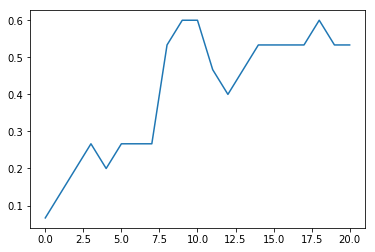

0.6986301369863014


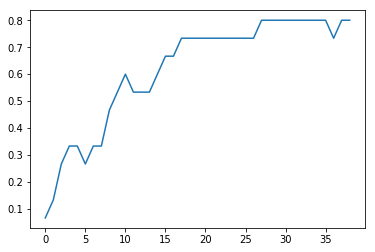

0.726027397260274


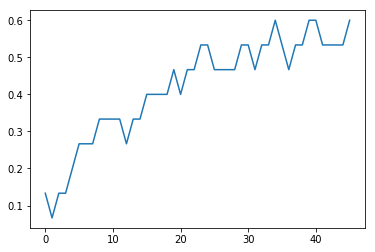

0.684931506849315
konacna matrica konfuzije: 
 [[24.  1.  0.  0.  1.  3.]
 [ 0. 12.  0.  3.  0. 15.]
 [ 0.  0. 22.  3.  0.  5.]
 [ 1.  1.  2. 17.  4.  5.]
 [ 0.  0.  1.  2. 40.  2.]
 [ 4.  6.  0.  3.  3. 39.]]
procenat tacno predvidjenih:  0.7031963470319634


In [260]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_undersample, y_undersample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_undersample.iloc[train_index,:], y_undersample.iloc[train_index])
    y_pred = classifier.predict(X_undersample.iloc[test_index,:])
    #y_pred_p = classifier.predict_proba(X.iloc[test_index,:])
    plt.figure
    plt.plot(classifier.validation_scores_)
    #plt.plot(classifier.loss_curve_)
    plt.show()
    print(accuracy_score(y_undersample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_undersample.iloc[test_index], y_pred)
print('konacna matrica konfuzije: \n', fin_conf_mat)
print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [261]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  tacnost je:  0.954337899543379
Za klasu  FR  tacnost je:  0.8812785388127854
Za klasu  GE  tacnost je:  0.9497716894977168
Za klasu  IT  tacnost je:  0.8904109589041096
Za klasu  UK  tacnost je:  0.9406392694063926
Za klasu  US  tacnost je:  0.7899543378995434
prosecna tacnost je:  0.9010654490106546


In [262]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  osetljivost je:  0.8275862068965517
Za klasu  FR  osetljivost je:  0.4
Za klasu  GE  osetljivost je:  0.7333333333333333
Za klasu  IT  osetljivost je:  0.5666666666666667
Za klasu  UK  osetljivost je:  0.8888888888888888
Za klasu  US  osetljivost je:  0.7090909090909091
prosecna osetljivost je:  0.6875943341460583


Upsampling of all classes except US

In [263]:
rest_ind = y.loc[y!='US'].index
us_ind = y.loc[y=='US'].index
#y_upsample = y.copy(deep=True)
#X_upsample = X.copy(deep=True)

X_dupl = X.iloc[rest_ind,:]
X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
X_upsample = X_duplicated.append(X.iloc[us_ind,:], ignore_index=True)

y_dupl = y.iloc[rest_ind]
y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
y_upsample = y_duplicated.append(y.iloc[us_ind], ignore_index=True)
        
print('original X: ', X.shape)
print('original y: ', y.shape)
print('redukovan X: ', X_upsample.shape)
print('redukovan y: ', y_upsample.shape)
y_upsample.groupby(by=y_upsample).count()

original X:  (329, 12)
original y:  (329,)
redukovan X:  (493, 12)
redukovan y:  (493,)


language
ES     58
FR     60
GE     60
IT     60
UK     90
US    165
Name: language, dtype: int64

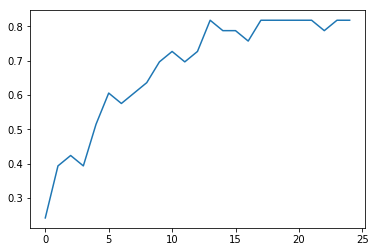

0.7696969696969697


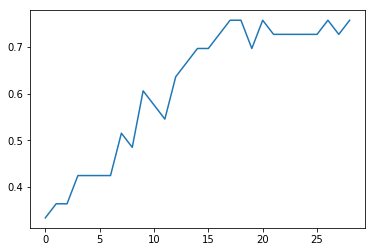

0.7560975609756098


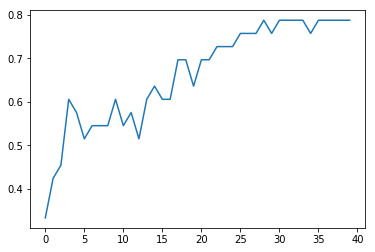

0.8292682926829268
konacna matrica konfuzije: 
 [[ 53.   0.   0.   0.   2.   3.]
 [  1.  47.   1.   2.   0.   9.]
 [  0.   1.  44.   6.   0.   9.]
 [  0.   2.   6.  42.   4.   6.]
 [  0.   2.   1.   7.  77.   3.]
 [ 11.  11.   6.   6.   7. 124.]]
procenat tacno predvidjenih:  0.7849898580121704


In [264]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
indexes = kf.split(X_upsample, y_upsample)
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_upsample)),len(np.unique(y_upsample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(X_upsample.iloc[train_index,:], y_upsample.iloc[train_index])
    y_pred = classifier.predict(X_upsample.iloc[test_index,:])
    #y_pred_p = classifier.predict_proba(X.iloc[test_index,:])
    plt.figure
    plt.plot(classifier.validation_scores_)
    #plt.plot(classifier.loss_curve_)
    plt.show()
    print(accuracy_score(y_upsample.iloc[test_index], y_pred))
    fin_conf_mat += confusion_matrix(y_upsample.iloc[test_index], y_pred)
print('konacna matrica konfuzije: \n', fin_conf_mat)
print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))


In [265]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  tacnost je:  0.9655172413793104
Za klasu  FR  tacnost je:  0.9411764705882353
Za klasu  GE  tacnost je:  0.9391480730223124
Za klasu  IT  tacnost je:  0.920892494929006
Za klasu  UK  tacnost je:  0.947261663286004
Za klasu  US  tacnost je:  0.8559837728194726
prosecna tacnost je:  0.9283299526707234


In [266]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, y.unique()))

Za klasu  ES  osetljivost je:  0.9137931034482759
Za klasu  FR  osetljivost je:  0.7833333333333333
Za klasu  GE  osetljivost je:  0.7333333333333333
Za klasu  IT  osetljivost je:  0.7
Za klasu  UK  osetljivost je:  0.8555555555555555
Za klasu  US  osetljivost je:  0.7515151515151515
prosecna osetljivost je:  0.789588412864275


In [273]:
#!pip install python_speech_features

In [299]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import os

test_samples = np.zeros((10,12))
label = []
i=0
dir = 'accent-recognition'
for filename in os.listdir(dir):
    if filename.endswith(".wav"):
        (rate,sig) = wav.read(os.path.join(dir,filename))
        mfcc_feat = mfcc(sig,rate, numcep=12)
        test_samples[i,:] = mfcc_feat.mean(axis=0)
        label.append(os.path.basename(filename)[:2])
        i+=1
X_test = pd.DataFrame(test_samples)
y_test = pd.DataFrame(label)
X_test.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,13.596317,13.769166,-15.368139,-3.882979,25.968806,-15.919239,20.338251,-19.147362,-16.259369,4.133750,-14.099837,0.499783
1,12.654263,-3.997975,-9.997289,-7.152550,11.790281,-24.306602,8.528665,-13.459479,-0.163449,-1.829921,-4.355760,5.470557
2,12.124462,0.811677,5.732237,-11.509470,10.506270,-19.786692,13.848628,-15.780185,-0.828550,2.200665,-7.312653,4.257107
3,12.130343,-11.488014,-6.886449,0.320902,17.680840,-22.299869,11.903588,-21.418134,-5.138466,-1.607433,-4.674570,1.330971
4,12.215831,-1.854420,-1.630390,-4.857822,18.751043,-15.971592,14.694817,-18.027944,-5.656894,-5.587857,-10.533508,2.537180


44100
(12,)


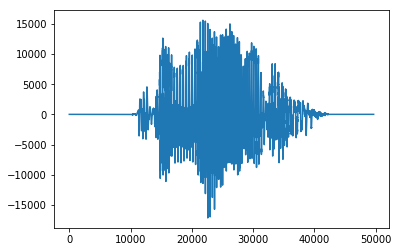

In [300]:
print(rate)
plt.plot(sig)
print(mfcc_feat.mean(axis=0).shape)

In [301]:
classifier1 = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
classifier1.fit(X,y)
print(classifier1.predict(X_test))
print(y_test)

classifier2 = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
classifier2.fit(X_undersample,y_undersample)
print(classifier2.predict(X_test))
print(y_test)


classifier3 = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
classifier3.fit(X_upsample,y_upsample)
print(classifier3.predict(X_test))
print(y_test)

['ES' 'ES' 'ES' 'ES' 'ES' 'ES' 'ES' 'ES' 'ES' 'ES']
    0
0  ES
1  FR
2  GE
3  IT
4  UK
5  US
6  US
7  US
8  US
9  US
['ES' 'ES' 'ES' 'ES' 'ES' 'ES' 'UK' 'UK' 'UK' 'ES']
    0
0  ES
1  FR
2  GE
3  IT
4  UK
5  US
6  US
7  US
8  US
9  US
['UK' 'ES' 'ES' 'UK' 'ES' 'UK' 'ES' 'UK' 'GE' 'ES']
    0
0  ES
1  FR
2  GE
3  IT
4  UK
5  US
6  US
7  US
8  US
9  US
